# ABOUT:
- this notebook:
    - summarizes the results found from previous notebooks
- insights:
    1. Fine tuning on **paraphrased spam may hurt performance** because the paraphrased emails may have their meaning altered detrimentally
    2. Using BERT architecture is superior
        - it is less time comsuming and yields great performance
    3. **Concatenating categorical features to as textual input improves further improves performance of BERT**
        - this highlights the importants of feature engineering. BERT is powerful in itself but we can further improve its performance by incorporating engineered features

### import data

In [ ]:
import pandas as pd
distilroberta_original = pd.read_csv(r"C:\Users\tanch\Documents\GitHub\Spam Detection (local)\RAM\loss_model_trained_on_original_data.txt",sep="\t")
distilroberta_paraphrased = pd.read_csv(r"C:\Users\tanch\Documents\GitHub\Spam Detection (local)\RAM\loss_model_trained_on_paraphrases.txt",sep="\t")
distilroberta_original.drop(["Training Loss"],inplace=True,axis=1)
distilroberta_paraphrased.drop(["Training Loss"],inplace=True,axis=1)

In [11]:
distilroberta_paraphrased = pd.melt(distilroberta_paraphrased,id_vars = ['Step'],value_vars = ["Validation Loss","F1"],var_name = "Metric")
distilroberta_paraphrased['Samples'] = "with paraphrased spam email"
distilroberta_original = pd.melt(distilroberta_original,id_vars = ['Step'],value_vars = ["Validation Loss","F1"],var_name = "Metric")
distilroberta_original['Samples'] = "original"
long_df = pd.concat([distilroberta_original,distilroberta_paraphrased])

In [42]:
long_df

,Step,Metric,value,Samples
0,26,Validation Loss,0.159405,original
1,52,Validation Loss,0.050771,original
2,78,Validation Loss,0.050729,original
3,104,Validation Loss,0.045369,original
4,130,Validation Loss,0.046775,original
5,26,F1,0.000000,original
6,52,F1,0.938679,original
7,78,F1,0.952153,original
8,104,F1,0.949881,original
9,130,F1,0.945368,original


## Did training on text augmented samples work?
- No.
- Observe the lineplots:
    - paraphrased spam emails appear to hurt performance slightly in terms of F1 and validation loss
- Observing the confusion matrix:
    - it appears that the model trained on more paraphrased spam emails **suffer in recall**
        - i.e it predicts non-spam when the emails are actually spam
        
- hypothesis:
    - the **paraphrased spam emails may have lost its crucial features that distinguish it from non-spam**

[Text(0, 0.5, 'F1')]

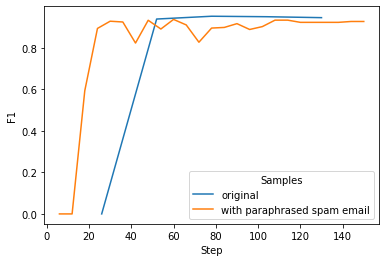

In [33]:
import seaborn as sb
m = "F1"
sb.lineplot(data = long_df[long_df.Metric ==m], y = "value", x = "Step", hue = "Samples").set(ylabel = m)

[Text(0, 0.5, 'Validation Loss')]

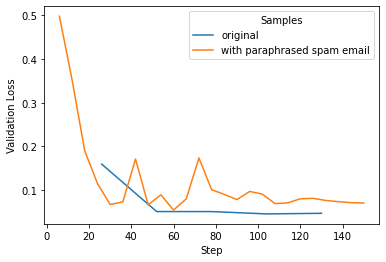

In [34]:
m = "Validation Loss"
sb.lineplot(data = long_df[long_df.Metric ==m], y = "value", x = "Step", hue = "Samples").set(ylabel = m)

DistilRoberta trained on original data


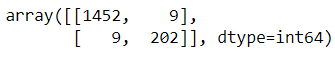

In [17]:
from IPython.display import Image
print("DistilRoberta trained on original data")
Image(filename=r"C:\Users\tanch\Documents\GitHub\Spam Detection (local)\RAM\cm_model_trained_on_original_data.PNG") 

DistilRoberta trained on paraphrased data


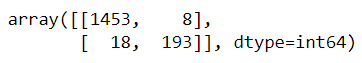

In [44]:
print("DistilRoberta trained on paraphrased data")
Image(filename=r"C:\Users\tanch\Documents\GitHub\Spam Detection (local)\RAM\cm_model_trained_on_paraphrased.PNG") 

- the columns refer to predicted 0 and 1's
- the rows refer to actual 0 and 1's

# How does distilroberta compare to manual extraction of categorical and numerical features?
- Using purely transformers architecture to solve this problem, the recall was better. 
    - distilroberta was able to predict a greater proportion of actual spam correctly
- using manual extraction of features from text, the precision was better
    - distil roberta predicted more non-spam as spam
    
- Overall, using **transformers architecture to solve is much more efficient and less time consuming, while yielding equal results**

- Below shows the confusion matrix obtained through:
    - extracting categorical and numerical features from the text
    - then training on a random forest, with application of grid search

Random forest trained categorical features


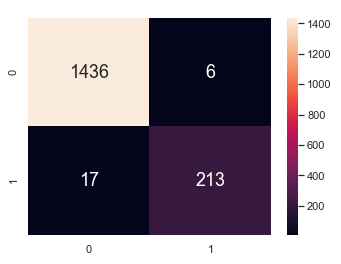

In [45]:
print("Random forest trained categorical features")
Image(filename=r"C:\Users\tanch\Documents\GitHub\Spam Detection (local)\RAM\cm_manual_feature_extraction.PNG") 

# Can concatenating categorical features to text improve transformers performance?
- Yes.
- we append categorical features (found to be good predictors) to the text as such:
    1. contains happy faces.
    2. contains links. 
- the resultant text is fed into transformers architecture as normal
- Observe the lineplots:
    - **concatenating categorical features to text improves F1 and validation loss**
- Observe the confusion matrix:
    - we see a slight drop in recall but greatly increased precision
        - i.e out of all predicted spam, only 2 where wrong (non-spam)

In [13]:
distilroberta_with_cat_features = pd.read_csv(r"C:\Users\tanch\Documents\GitHub\Spam Detection (local)\RAM\loss_model_trained_on_categorical_feature_appended_text.txt",sep="\t")
distilroberta_with_cat_features.drop(["Training Loss"],inplace=True,axis=1)
distilroberta_with_cat_features = pd.melt(distilroberta_with_cat_features,id_vars = ['Step'],value_vars = ["Validation Loss","F1"],var_name = "Metric")
distilroberta_with_cat_features['Samples'] = "Appended with categorical features"
long_df = pd.concat([distilroberta_original,distilroberta_with_cat_features])
long_df

,Step,Metric,value,Samples
0,26,Validation Loss,0.159405,original
1,52,Validation Loss,0.050771,original
2,78,Validation Loss,0.050729,original
3,104,Validation Loss,0.045369,original
4,130,Validation Loss,0.046775,original
5,26,F1,0.000000,original
6,52,F1,0.938679,original
7,78,F1,0.952153,original
8,104,F1,0.949881,original
9,130,F1,0.945368,original


[Text(0, 0.5, 'F1')]

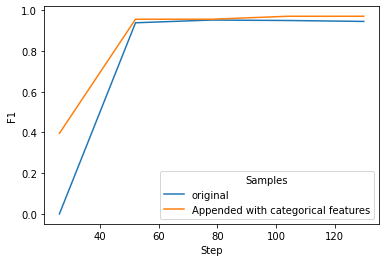

In [14]:
import seaborn as sb
m = "F1"
sb.lineplot(data = long_df[long_df.Metric ==m], y = "value", x = "Step", hue = "Samples").set(ylabel = m)

[Text(0, 0.5, 'Validation Loss')]

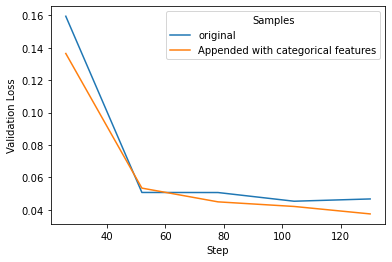

In [15]:
m = "Validation Loss"
sb.lineplot(data = long_df[long_df.Metric ==m], y = "value", x = "Step", hue = "Samples").set(ylabel = m)

DistilRoberta trained with textual-categorical features


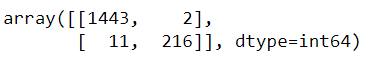

In [18]:
print("DistilRoberta trained with textual-categorical features")
Image(filename=r"C:\Users\tanch\Documents\GitHub\Spam Detection (local)\RAM\cm_model_trained_categorical_feature_appended_text.PNG") 